# Creación de Nuevas Variables

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

In [63]:
c_diesel = pd.read_csv(r"C:\Users\andre\OneDrive\Escritorio\USFQ\Fundamentos en Ciencia de Datos\Proyeccion_Consumo_Diesel\dataset\Consumo_Diesel_mLimpio.csv")
c_diesel.head()

,FECHA,DISPENSADOR,HORA,VEHICULO,FLOTA,GALONES,KILOMETRAJE,ANIO
0,2020-01-01,1,10:35:00,S024,B12M,535680.0,411475.8,2020
1,2020-01-01,1,12:12:00,S029,B12M,541970.0,479353.4,2020
2,2020-01-01,1,12:20:00,S011,B12M,565560.0,463696.8,2020
3,2020-01-01,1,13:10:00,S074,B12M,656140.0,451279.5,2020
4,2020-01-01,1,13:30:00,S015,B12M,428790.0,418781.5,2020


Convertir FECHA a datetime.

In [64]:
c_diesel['FECHA'] = pd.to_datetime(c_diesel['FECHA'])


Se establecen variables temporales. Estas variables nos permiten estudiar patrones estacionales y semanales de consumo.

In [65]:
c_diesel['DIA_SEMANA'] = c_diesel['FECHA'].dt.dayofweek
c_diesel['MES'] = c_diesel['FECHA'].dt.month
c_diesel['DIA'] = c_diesel['FECHA'].dt.day
c_diesel['ANIO'] = c_diesel['FECHA'].dt.year

Asegurar que GALONES sea float (ya corregido separador decimal previamente).

In [66]:
c_diesel['GALONES'] = c_diesel['GALONES'].astype(float)

Reemplazar ceros en kilometraje para evitar división por cero.

In [67]:
c_diesel = c_diesel[c_diesel['KILOMETRAJE'] != 0]

Variable derivada: eficiencia del consumo, esta variable permite detectar qué tan eficiente es el uso del combustible por kilómetro recorrido.

In [68]:
c_diesel['GALONES_POR_KM'] = c_diesel['GALONES'] / c_diesel['KILOMETRAJE']

Codificación de variables categóricas. Se usa Label Encoding porque modelos de árboles pueden procesar variables ordinales.

In [69]:
le_vehiculo = LabelEncoder()
le_flota = LabelEncoder()
c_diesel['VEHICULO_ENC'] = le_vehiculo.fit_transform(c_diesel['VEHICULO'])
c_diesel['FLOTA_ENC'] = le_flota.fit_transform(c_diesel['FLOTA'])
c_diesel.head()

,FECHA,DISPENSADOR,HORA,VEHICULO,FLOTA,GALONES,KILOMETRAJE,ANIO,DIA_SEMANA,MES,DIA,GALONES_POR_KM,VEHICULO_ENC,FLOTA_ENC
0,2020-01-01,1,10:35:00,S024,B12M,535680.0,411475.8,2020,2,1,1,1.301851,96,2
1,2020-01-01,1,12:12:00,S029,B12M,541970.0,479353.4,2020,2,1,1,1.130627,101,2
2,2020-01-01,1,12:20:00,S011,B12M,565560.0,463696.8,2020,2,1,1,1.219676,83,2
3,2020-01-01,1,13:10:00,S074,B12M,656140.0,451279.5,2020,2,1,1,1.453955,145,2
4,2020-01-01,1,13:30:00,S015,B12M,428790.0,418781.5,2020,2,1,1,1.023899,87,2


# Selección de Variables

Se analizan las variables con poca variabilidad. Lo que indica que variables con desviación estándar muy baja pueden eliminarse.

In [70]:
variabilidad = c_diesel.std(numeric_only=True).sort_values()
print("Variables con menor variabilidad:\n", variabilidad)

Variables con menor variabilidad:
 ANIO              1.070067e+00
DISPENSADOR       1.204456e+00
DIA_SEMANA        1.911405e+00
FLOTA_ENC         1.911857e+00
MES               3.411460e+00
DIA               8.752879e+00
VEHICULO_ENC      8.715255e+01
GALONES_POR_KM    1.415496e+03
KILOMETRAJE       3.144600e+05
GALONES           1.360346e+08
dtype: float64


Se elabora una matriz de correlación, en el caso de que dos variables tienen correlación > 0.95, se puede conservar solo una para evitar redundancia.

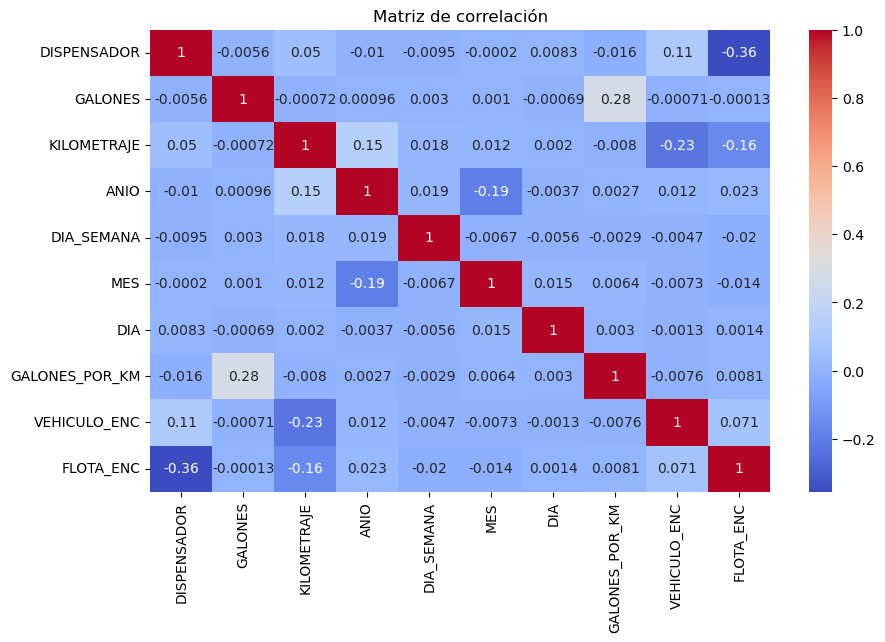

In [71]:
corr_matrix = c_diesel.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

# Reducción de Dimensionalidad

En caso de existir, se reemplazan los infinitos por Nan.

In [72]:
c_diesel.replace([np.inf, -np.inf], np.nan, inplace=True)
c_diesel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192946 entries, 0 to 193390
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   FECHA           192946 non-null  datetime64[ns]
 1   DISPENSADOR     192946 non-null  int64         
 2   HORA            192943 non-null  object        
 3   VEHICULO        192946 non-null  object        
 4   FLOTA           192946 non-null  object        
 5   GALONES         192943 non-null  float64       
 6   KILOMETRAJE     192946 non-null  float64       
 7   ANIO            192946 non-null  int32         
 8   DIA_SEMANA      192946 non-null  int32         
 9   MES             192946 non-null  int32         
 10  DIA             192946 non-null  int32         
 11  GALONES_POR_KM  192943 non-null  float64       
 12  VEHICULO_ENC    192946 non-null  int32         
 13  FLOTA_ENC       192946 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(6

Eliminamos posibles valores nulos.

In [73]:
features = ['GALONES', 'KILOMETRAJE', 'GALONES_POR_KM']
c_diesel.dropna(subset=features, inplace=True)
c_diesel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192943 entries, 0 to 193390
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   FECHA           192943 non-null  datetime64[ns]
 1   DISPENSADOR     192943 non-null  int64         
 2   HORA            192940 non-null  object        
 3   VEHICULO        192943 non-null  object        
 4   FLOTA           192943 non-null  object        
 5   GALONES         192943 non-null  float64       
 6   KILOMETRAJE     192943 non-null  float64       
 7   ANIO            192943 non-null  int32         
 8   DIA_SEMANA      192943 non-null  int32         
 9   MES             192943 non-null  int32         
 10  DIA             192943 non-null  int32         
 11  GALONES_POR_KM  192943 non-null  float64       
 12  VEHICULO_ENC    192943 non-null  int32         
 13  FLOTA_ENC       192943 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(6

Transformamos los datos numéricos para que todas las variables estén en la misma escala o rango de valores para equilibrar el análisis de los datos.

In [74]:
X_scaled = StandardScaler().fit_transform(c_diesel[features])

Aplicamos PCA ya que este reducir dimensionalidad y detectar combinaciones lineales útiles entre variables correlacionadas.

In [75]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

Se añaden al dataset.

In [76]:
c_diesel['PC1'] = principal_components[:, 0]
c_diesel['PC2'] = principal_components[:, 1]
c_diesel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192943 entries, 0 to 193390
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   FECHA           192943 non-null  datetime64[ns]
 1   DISPENSADOR     192943 non-null  int64         
 2   HORA            192940 non-null  object        
 3   VEHICULO        192943 non-null  object        
 4   FLOTA           192943 non-null  object        
 5   GALONES         192943 non-null  float64       
 6   KILOMETRAJE     192943 non-null  float64       
 7   ANIO            192943 non-null  int32         
 8   DIA_SEMANA      192943 non-null  int32         
 9   MES             192943 non-null  int32         
 10  DIA             192943 non-null  int32         
 11  GALONES_POR_KM  192943 non-null  float64       
 12  VEHICULO_ENC    192943 non-null  int32         
 13  FLOTA_ENC       192943 non-null  int32         
 14  PC1             192943 non-null  float64 

# Variables Creadas:

 - DIA_SEMANA, MES, DIA, ANIO: aportan información temporal relevante para entender patrones de consumo.
 - GALONES_POR_KM: mide eficiencia del consumo.
 - VEHICULO_ENC, FLOTA_ENC: transformaciones necesarias para que los modelos entiendan variables categóricas.
 - PC1, PC2: componentes principales que resumen información si se decide reducir dimensionalidad.


In [ ]:
#c_diesel.to_csv(r"C:\Users\andre\OneDrive\Escritorio\USFQ\Fundamentos en Ciencia de Datos\Proyeccion_Consumo_Diesel\dataset\Consumo_Diesel_Model.csv", index=False)